In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.display import display
from scipy import stats

%matplotlib inline 
np.random.seed(42)

In [3]:
hr_df = pd.read_pickle('hr_df.p')

### Survival Analysis

In [4]:
from lifelines import KaplanMeierFitter

### We saw that there were some outliers in YearsAtCompany
- Let's explore this further

In [5]:
hr_df['YearsAtCompany'].describe() #mean = 7 years, std = 6 years

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

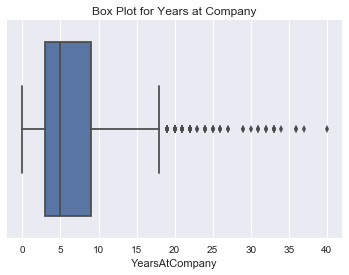

In [7]:
sns.boxplot(hr_df['YearsAtCompany'])
plt.title('Box Plot for Years at Company')
plt.show()

In [8]:
threshold = np.std(hr_df['YearsAtCompany']) * 3 # 3 std above mean
len(hr_df[hr_df['YearsAtCompany'] > np.mean(hr_df['YearsAtCompany']) + threshold])

25

### 25 observations are above 3 standard deviations above the mean
- $~$1.7% of data
- We will drop these for the survival analysis

In [9]:
hr_df = hr_df[hr_df['YearsAtCompany'] < np.mean(hr_df['YearsAtCompany']) + threshold]

In [10]:
hr_df[hr_df['YearsAtCompany'] < 1].describe()

,Attrition,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0,44.0,44.0,44.0
mean,0.363636,31.227273,770.659091,8.477273,68.886364,1.522727,4113.500000,14328.363636,2.909091,15.454545,0.613636,5.840909,3.250000,0.0,0.0,0.0,0.0
std,0.486607,10.924399,437.970687,7.659888,20.000251,0.820908,3457.072525,7806.661062,2.043915,3.507166,0.969678,5.472737,1.416268,0.0,0.0,0.0,0.0
min,0.000000,18.000000,111.000000,1.000000,32.000000,1.000000,1051.000000,2396.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.000000,21.750000,388.500000,2.000000,51.750000,1.000000,1897.500000,7437.500000,1.000000,12.750000,0.000000,0.750000,2.000000,0.0,0.0,0.0,0.0
50%,0.000000,29.500000,649.500000,6.000000,71.500000,1.000000,2923.500000,14092.500000,3.000000,15.000000,0.000000,5.000000,3.000000,0.0,0.0,0.0,0.0
75%,1.000000,40.500000,1190.500000,12.250000,84.000000,2.000000,5095.500000,20493.250000,4.000000,18.250000,1.000000,8.500000,4.250000,0.0,0.0,0.0,0.0
max,1.000000,56.000000,1495.000000,29.000000,100.000000,5.000000,18061.000000,26820.000000,8.000000,24.000000,3.000000,22.000000,6.000000,0.0,0.0,0.0,0.0


### Kaplan Meier Estimator

In [11]:
kmf = KaplanMeierFitter()
kmf.fit(durations = hr_df['YearsAtCompany'],
        event_observed =hr_df['Attrition'])
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,44,16,28,1445,1445
1,171,59,112,0,1401
2,127,27,100,0,1230
3,128,20,108,0,1103
4,110,19,91,0,975
5,196,21,175,0,865
6,76,9,67,0,669
7,90,11,79,0,593
8,80,9,71,0,503


In [51]:
def build_survival_plot(column, split1, split2):
    df_1 = hr_df[hr_df[column] == split1]
    df_2 = hr_df[hr_df[column] == split2]
    ax = plt.subplot(111)

    kmf.fit(durations = df_1['YearsAtCompany'], 
        event_observed = df_1['Attrition'], label = split1)
    kmf.plot(ax = ax)

    kmf.fit(durations = df_2['YearsAtCompany'], 
        event_observed = df_2['Attrition'], label = split2)
    kmf.plot(ax = ax)

    plt.title('Survival function for ' + column)
    plt.xlabel('Years')
    plt.ylabel('Probability of still working at company')

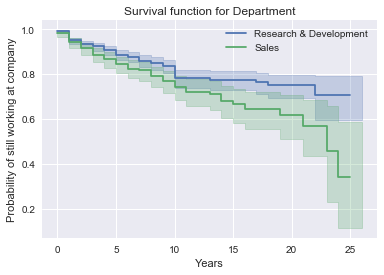

In [52]:
build_survival_plot('Department', 'Research & Development', 'Sales')

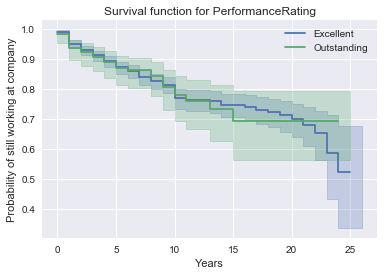

In [53]:
build_survival_plot('PerformanceRating', 'Excellent', 'Outstanding')

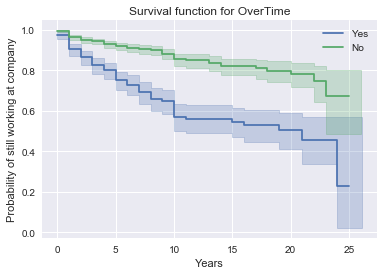

In [54]:
build_survival_plot('OverTime', 'Yes', 'No')

### Lokking at JobSatisfaction

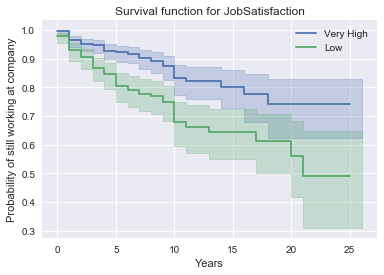

In [55]:
build_survival_plot('JobSatisfaction', 'Very High', 'Low')

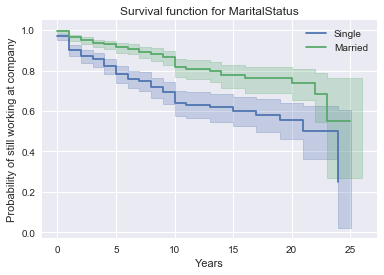

In [56]:
build_survival_plot('MaritalStatus', 'Single', 'Married')

In [57]:
df_old = hr_df[hr_df['Age'] >= 40]
df_young = hr_df[hr_df['Age'] < 40]

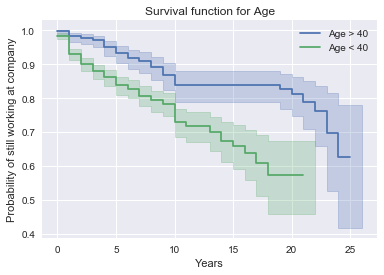

In [58]:
ax = plt.subplot(111)

kmf.fit(durations = df_old['YearsAtCompany'], 
        event_observed = df_old['Attrition'], label = 'Age > 40')
kmf.plot(ax = ax)

kmf.fit(durations = df_young['YearsAtCompany'], 
        event_observed = df_young['Attrition'], label = 'Age < 40')
kmf.plot(ax = ax)

plt.title('Survival function for Age')
plt.xlabel('Years')
plt.ylabel('Probability of still working at company')

In [59]:
df_rich = hr_df[hr_df['MonthlyIncome'] >= 4833]
df_poor = hr_df[hr_df['MonthlyIncome'] < 4833]

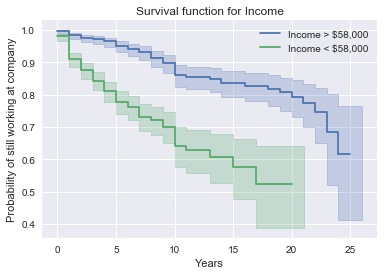

In [60]:
ax = plt.subplot(111)

kmf.fit(durations = df_rich['YearsAtCompany'], 
        event_observed = df_rich['Attrition'], label = 'Income > $58,000')
kmf.plot(ax = ax)

kmf.fit(durations = df_poor['YearsAtCompany'], 
        event_observed = df_poor['Attrition'], label = 'Income < $58,000')
kmf.plot(ax = ax)

plt.title('Survival function for Income')
plt.xlabel('Years')
plt.ylabel('Probability of still working at company')

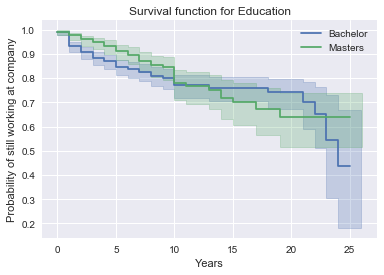

In [61]:
build_survival_plot('Education', 'Bachelor', 'Masters')

### Looking at gender

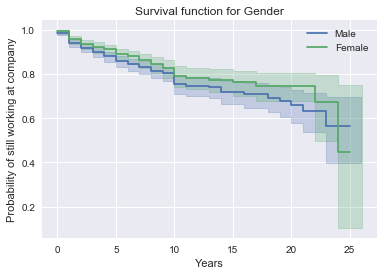

In [62]:
build_survival_plot('Gender', 'Male', 'Female')

In [63]:
df_far = hr_df[hr_df['DistanceFromHome'] >= 7]
df_close = hr_df[hr_df['DistanceFromHome'] < 7]

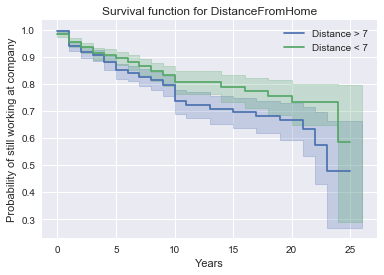

In [64]:
ax = plt.subplot(111)

kmf.fit(durations = df_far['YearsAtCompany'], 
        event_observed = df_far['Attrition'], label = 'Distance > 7')
kmf.plot(ax = ax)

kmf.fit(durations = df_close['YearsAtCompany'], 
        event_observed = df_close['Attrition'], label = 'Distance < 7')
kmf.plot(ax = ax)

plt.title('Survival function for DistanceFromHome')
plt.xlabel('Years')
plt.ylabel('Probability of still working at company')

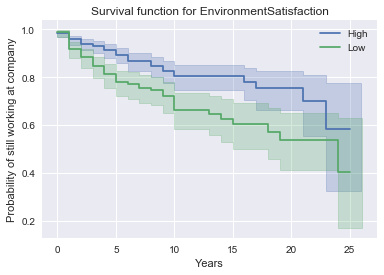

In [65]:
build_survival_plot('EnvironmentSatisfaction', 'High', 'Low')

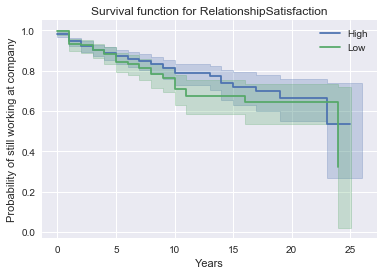

In [66]:
build_survival_plot('RelationshipSatisfaction', 'High', 'Low')

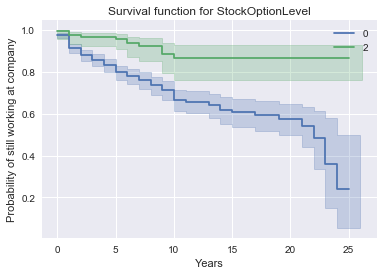

In [67]:
build_survival_plot('StockOptionLevel', 0, 2)

In [76]:
df_b = hr_df[hr_df['NumCompaniesWorked'] >= 1]
df_s = hr_df[hr_df['NumCompaniesWorked'] < 1]

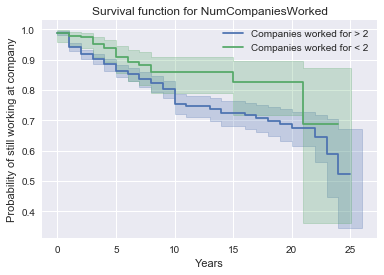

In [77]:
ax = plt.subplot(111)

kmf.fit(durations = df_b['YearsAtCompany'], 
        event_observed = df_b['Attrition'], label = 'Companies worked for > 1')
kmf.plot(ax = ax)

kmf.fit(durations = df_s['YearsAtCompany'], 
        event_observed = df_s['Attrition'], label = 'Companies worked for < 1')
kmf.plot(ax = ax)

plt.title('Survival function for NumCompaniesWorked')
plt.xlabel('Years')
plt.ylabel('Probability of still working at company')

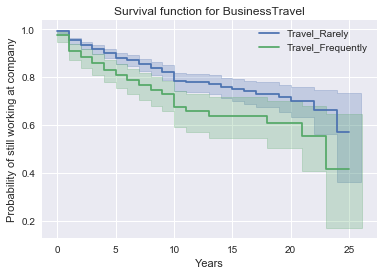

In [69]:
build_survival_plot('BusinessTravel', 'Travel_Rarely', 'Travel_Frequently')

### Likely Important Features for Attrition
- Overtime
- JobSatisfaction
- MaritalStatus
- Age
- MonthlyIncome
- EnvironmentSatisfaction
- StockOptionLevel
- NumCompaniesWorked